<a href="https://colab.research.google.com/github/Noors-lab/pytorch_stuffs/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# the libraries


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# The dataset

In [13]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

df = pd.read_csv(url)

#encoding the dataset
df['species_encoded'] = df['species'].astype('category').cat.codes
df.drop('species',axis=1,inplace=True)
df.head(100)
# searching for an outlier
#print(df.describe())
# searching for missing value
#print(df.isnull().sum())

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# spliting the data

In [14]:
# features
X = df.drop(columns=['species_encoded'])
# target
y = df['species_encoded']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=41)


# converting to Tensor

In [17]:
#convert x features to FloatTensor
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

#convert y labels to LongTensor
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# simple nn model

In [23]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  #input layer (4 features of the flower (iris_dataset))-->
  #Hidden layer 1 -->
  #Hidden layer 2 -->
  #output layer --> show predictions of the 3 classes
  def __init__(self,in_features=4, h1=10, h2=8, out_features=3):
    super().__init__() # instantiate out nn.module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [24]:
# randomization
torch.manual_seed(41)
# create an instance for model
model = Model()

In [25]:
# setting the loss
criterion = nn.CrossEntropyLoss()

#setting the adam optimizer and learning rate

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [39]:
# training the model
epochs = 300
losses = []

for iter in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred,y_train)

# keep track of the losses

  losses.append(loss.detach().numpy())

  if iter % 10 == 0:
    print(f"epochs : {iter} , loss : {loss}")


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs : 0 , loss : 0.0033985988702625036
epochs : 10 , loss : 0.003369617508724332
epochs : 20 , loss : 0.003340966533869505
epochs : 30 , loss : 0.003312815446406603
epochs : 40 , loss : 0.0032840901985764503
epochs : 50 , loss : 0.0032555668149143457
epochs : 60 , loss : 0.003227868350222707
epochs : 70 , loss : 0.0032000390347093344
epochs : 80 , loss : 0.003172642085701227
epochs : 90 , loss : 0.003145473310723901
epochs : 100 , loss : 0.0031184351537376642
epochs : 110 , loss : 0.003091626102104783
epochs : 120 , loss : 0.003065237309783697
epochs : 130 , loss : 0.003038740251213312
epochs : 140 , loss : 0.003012771252542734
epochs : 150 , loss : 0.0029865114483982325
epochs : 160 , loss : 0.0029609601479023695
epochs : 170 , loss : 0.002935251919552684
epochs : 180 , loss : 0.002910231240093708
epochs : 190 , loss : 0.0028851660899817944
epochs : 200 , loss : 0.002860031323507428
epochs : 210 , loss : 0.002835282124578953
epochs : 220 , loss : 0.002810913836583495
epochs : 230 ,

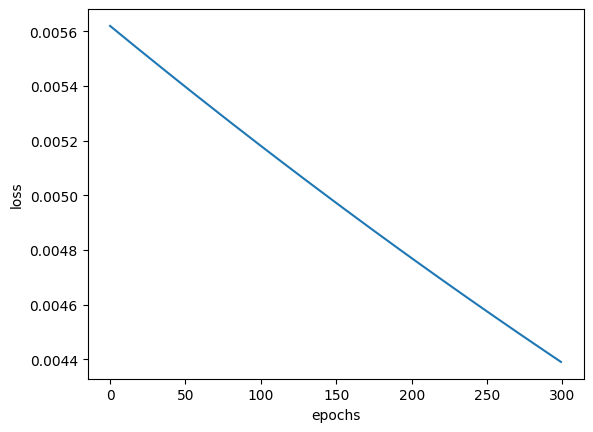

In [37]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [41]:
# evaluation

with torch.no_grad(): # this turns off the back prop

  y_eval = model.forward(X_test)

  loss = criterion(y_eval,y_test)

In [42]:
loss

tensor(0.4293)

In [46]:
# evaluating on new data

new_iris = torch.tensor([4.7,3.2,0.2,1.9])

with torch.no_grad():
  print(model(new_iris))

newer_iris = torch.tensor([5.7,	3.0	,4.2 , 1.2])

with torch.no_grad():
  print(model(newer_iris))


tensor([ 31.9452,  30.6305, -39.6031])
tensor([ 11.7860,  24.8541, -19.7582])


In [56]:
# saving the model
torch.save(model.state_dict(), "simple_iris_nn_model.pt")